# PART D

### D. Intersect the analysis of Fst and XP-EHH.

In [16]:
# load packages

library(tidyverse)
library(rehh)
library(repr)

In [52]:
#read in the data

snps <- read.table("snps_filtered.txt", sep = '\t')
colnames(snps) = c("id", "chr", "pos", "ANC", "DER")
snps <- snps %>% arrange(pos) 
head(snps)
nrow(snps)

,id,chr,pos,ANC,DER
,<chr>,<chr>,<int>,<chr>,<chr>
1,X:X_365712,X,365712,A,G
2,X:X_400000,X,400000,T,C
3,X:X_400108,X,400108,A,G
4,X:X_400132,X,400132,T,G
5,X:X_400148,X,400148,A,G
6,X:X_400303,X,400303,C,G


[1] 411892

## Read in the genes that overlapped the significant regions for the three statistics

In [17]:
# FST
genes_FST_AF_WE <- read.table("gene_names_AF_WE_FST.csv", header = TRUE, sep = '\t')
genes_FST_AF_EA <- read.table("gene_names_EA_AF_FST.csv", header = TRUE, sep = '\t')
genes_FST_WE_EA <- read.table("gene_names_WE_EA_FST.csv", header = TRUE, sep = '\t')

#iHS
genes_mean_iHS_AF <- read.table("gene_names_AF_mean_ihs.csv", header = TRUE, sep = '\t')
genes_n_signif_iHS_AF <- read.table("gene_names_AF_n_signif_ihs.csv", header = TRUE, sep = '\t')

genes_mean_iHS_WE <- read.table("gene_names_WE_mean_ihs.csv", header = TRUE, sep = '\t')
genes_n_signif_iHS_WE <- read.table("gene_names_WE_n_signif_ihs.csv", header = TRUE, sep = '\t')

genes_mean_iHS_EA <- read.table("gene_names_EA_mean_ihs.csv", header = TRUE, sep = '\t')
genes_n_signif_iHS_EA <- read.table("gene_names_EA_n_signif_ihs.csv", header = TRUE, sep = '\t')

#XP-EHH
genes_mean_xpehh_AF_WE <- read.table("gene_names_WE_AF_mean_xpehh.csv", header = TRUE, sep = '\t')
genes_n_signif_xpehh_AF_WE <- read.table("gene_names_WE_AF_n_signif_xpehh.csv", header = TRUE, sep = '\t')

genes_mean_xpehh_AF_EA <- read.table("gene_names_EA_AF_mean_xpehh.csv", header = TRUE, sep = '\t')
genes_n_signif_xpehh_AF_EA <- read.table("gene_names_EA_AF_n_signif_xpehh.csv", header = TRUE, sep = '\t')

genes_mean_xpehh_WE_EA <- read.table("gene_names_EA_WE_mean_xpehh.csv", header = TRUE, sep = '\t')
genes_n_signif_xpehh_WE_EA <- read.table("gene_names_EA_WE_n_signif_xpehh.csv", header = TRUE, sep = '\t')


## Intersect FST and XPEHH

## Africa - WestEurasia

In [18]:
intersect(genes_FST_AF_WE, genes_mean_xpehh_AF_WE)
intersect(genes_FST_AF_WE, genes_n_signif_xpehh_AF_WE)

gene_id
<chr>


gene_id
<chr>


## Africa - EastAsia

In [19]:
intersect(genes_FST_AF_EA, genes_mean_xpehh_AF_EA)
intersect(genes_FST_AF_EA, genes_n_signif_xpehh_AF_EA)

gene_id
<chr>


gene_id
<chr>


## WestEurasia - EastAsia

In [20]:
intersect(genes_FST_WE_EA, genes_mean_xpehh_WE_EA)
intersect(genes_FST_WE_EA, genes_n_signif_xpehh_WE_EA)

gene_id
<chr>


gene_id
<chr>


## Intersect FST and iHS

In [21]:
#Africa
intersect(genes_FST_AF_WE, genes_mean_iHS_AF)
intersect(genes_FST_AF_WE, genes_n_signif_iHS_AF)

intersect(genes_FST_AF_EA, genes_mean_iHS_AF)
intersect(genes_FST_AF_EA, genes_n_signif_iHS_AF)

#WestEurasia
intersect(genes_FST_AF_WE, genes_mean_iHS_WE)
intersect(genes_FST_AF_WE, genes_n_signif_iHS_WE)

intersect(genes_FST_WE_EA, genes_mean_iHS_WE)
intersect(genes_FST_WE_EA, genes_n_signif_iHS_WE)

#EastAsia
intersect(genes_FST_AF_EA, genes_mean_iHS_EA)
intersect(genes_FST_WE_EA, genes_n_signif_iHS_EA)

intersect(genes_FST_AF_EA, genes_mean_iHS_EA)
intersect(genes_FST_WE_EA, genes_n_signif_iHS_EA)

gene_id
<chr>


gene_id
<chr>


gene_id
<chr>


gene_id
<chr>


gene_id
<chr>
ENSG00000250349.3_6


gene_id
<chr>


gene_id
<chr>


gene_id
<chr>
ENSG00000264396.1
ENSG00000186871.7_5
ENSG00000102309.13_5
ENSG00000198034.11_3


gene_id
<chr>
ENSG00000260683.1_5
ENSG00000274631.1_5


gene_id
<chr>


gene_id
<chr>
ENSG00000260683.1_5
ENSG00000274631.1_5


gene_id
<chr>


## Plot significant regions of XPEHH and FST

In [25]:
################ READ IN FST RESULTS #####################

FST_AF_WE_500_genes <- read.table("FST_AF_WE_high_500_genes.bed", header = FALSE, sep = '\t')
colnames(FST_AF_WE_500_genes)  <- c("chr1", "start1", "end1", "avg_FST", "chr2", "start2", "end2", "gene_id", "overlap")

FST_AF_WE_500_genes  <- FST_AF_WE_500_genes %>% filter(overlap != 0)  %>% 
    distinct_at(vars(chr1, start1, end1, gene_id), .keep_all = TRUE)


FST_EA_AF_500_genes <- read.table("FST_EA_AF_high_500_genes.bed", header = FALSE, sep = '\t')
colnames(FST_EA_AF_500_genes)  <- c("chr1", "start1", "end1", "avg_FST", "chr2", "start2", "end2", "gene_id", "overlap")

FST_EA_AF_500_genes  <- FST_EA_AF_500_genes %>% filter(overlap != 0)  %>% 
    distinct_at(vars(chr1, start1, end1, gene_id), .keep_all = TRUE)


FST_WE_EA_500_genes <- read.table("FST_WE_EA_high_500_genes.bed", header = FALSE, sep = '\t')
colnames(FST_WE_EA_500_genes)  <- c("chr1", "start1", "end1", "avg_FST", "chr2", "start2", "end2", "gene_id", "overlap")

FST_WE_EA_500_genes  <- FST_WE_EA_500_genes %>% filter(overlap != 0)  %>% 
    distinct_at(vars(chr1, start1, end1, gene_id), .keep_all = TRUE)

################ READ IN IHS RESULTS #####################

prop_signif_ihs_AF_high_500_genes <- read.table("prop_signif_ihs_AF_high_500_genes.bed", header = FALSE, sep = '\t')
colnames(prop_signif_ihs_AF_high_500_genes)  <- c("chr1", "start1", "end1", "prop_signif", "avg_ihs", "chr2", "start2", "end2", "gene_id", "overlap")

prop_signif_ihs_AF_high_500_genes  <- prop_signif_ihs_AF_high_500_genes %>% filter(overlap != 0)  %>% 
    distinct_at(vars(chr1, start1, end1, gene_id), .keep_all = TRUE)



prop_signif_ihs_WE_high_500_genes <- read.table("prop_signif_ihs_WE_high_500_genes.bed", header = FALSE, sep = '\t')
colnames(prop_signif_ihs_WE_high_500_genes)  <- c("chr1", "start1", "end1", "prop_signif", "avg_ihs", "chr2", "start2", "end2", "gene_id", "overlap")

prop_signif_ihs_WE_high_500_genes  <- prop_signif_ihs_WE_high_500_genes %>% filter(overlap != 0)  %>% 
    distinct_at(vars(chr1, start1, end1, gene_id), .keep_all = TRUE)



prop_signif_ihs_EA_high_500_genes <- read.table("prop_signif_ihs_EA_high_500_genes.bed", header = FALSE, sep = '\t')
colnames(prop_signif_ihs_EA_high_500_genes)  <- c("chr1", "start1", "end1", "prop_signif", "avg_ihs", "chr2", "start2", "end2", "gene_id", "overlap")

prop_signif_ihs_EA_high_500_genes  <- prop_signif_ihs_EA_high_500_genes %>% filter(overlap != 0)  %>% 
    distinct_at(vars(chr1, start1, end1, gene_id), .keep_all = TRUE)

################ READ IN XPEHH RESULTS #####################

prop_signif_xpehh_WE_AF_high_500_genes <- read.table("prop_signif_xpehh_WE_AF_high_500_genes.bed", header = FALSE, sep = '\t')
colnames(prop_signif_xpehh_WE_AF_high_500_genes)  <- c("chr1", "start1", "end1", "prop_signif", "avg_xpehh", "chr2", "start2", "end2", "gene_id", "overlap")

prop_signif_xpehh_WE_AF_high_500_genes  <- prop_signif_xpehh_WE_AF_high_500_genes %>% filter(overlap != 0)  %>% 
    distinct_at(vars(chr1, start1, end1, gene_id), .keep_all = TRUE)



prop_signif_xpehh_EA_AF_high_500_genes <- read.table("prop_signif_xpehh_EA_AF_high_500_genes.bed", header = FALSE, sep = '\t')
colnames(prop_signif_xpehh_EA_AF_high_500_genes)  <- c("chr1", "start1", "end1", "prop_signif", "avg_xpehh", "chr2", "start2", "end2", "gene_id", "overlap")

prop_signif_xpehh_EA_AF_high_500_genes  <- prop_signif_xpehh_EA_AF_high_500_genes %>% filter(overlap != 0)  %>% 
    distinct_at(vars(chr1, start1, end1, gene_id), .keep_all = TRUE)



prop_signif_xpehh_EA_WE_high_500_genes <- read.table("prop_signif_xpehh_EA_WE_high_500_genes.bed", header = FALSE, sep = '\t')
colnames(prop_signif_xpehh_EA_WE_high_500_genes)  <- c("chr1", "start1", "end1", "prop_signif", "avg_xpehh", "chr2", "start2", "end2", "gene_id", "overlap")

prop_signif_xpehh_EA_WE_high_500_genes  <- prop_signif_xpehh_EA_WE_high_500_genes %>% filter(overlap != 0)  %>% 
    distinct_at(vars(chr1, start1, end1, gene_id), .keep_all = TRUE)

In [50]:
#read in genotype data

GT_AF <- read.table("genotypes_AF", sep = '\t', header = F)
head(GT_AF)

GT_WE <- read.table("genotypes_WE", sep = '\t', header = F)
head(GT_WE)

GT_EA <- read.table("genotypes_EA", sep = '\t', header = F)
head(GT_EA)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,A,A,A,A,A,A,A,A,A,A,⋯,A,A,A,A,A,A,A,A,A,A
2,T,T,T,T,T,T,T,T,T,T,⋯,T,T,T,T,C,T,T,T,T,T
3,G,G,G,A,G,G,G,G,G,G,⋯,G,G,G,G,G,G,G,G,G,G
4,G,T,T,T,G,G,T,T,T,T,⋯,T,T,G,T,T,T,G,T,T,T
5,A,A,A,A,A,A,A,A,A,A,⋯,A,A,A,A,A,A,A,A,A,A
6,G,C,C,G,C,C,G,C,C,C,⋯,C,C,C,G,G,G,G,C,C,C


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,A,A,A,A,A,A,A,A,A,A,⋯,A,A,A,A,A,A,A,A,A,A
2,T,T,T,T,T,T,T,T,T,T,⋯,T,T,T,T,T,T,T,T,T,T
3,A,A,A,A,A,A,A,A,A,G,⋯,A,A,A,G,A,A,A,A,A,A
4,T,T,T,T,T,T,T,T,T,T,⋯,T,T,T,T,T,T,T,T,T,T
5,A,A,A,A,A,A,A,A,A,A,⋯,A,A,A,A,A,A,A,A,A,A
6,C,G,G,G,G,G,G,G,G,C,⋯,C,G,C,G,C,C,G,C,G,G


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,A,A,A,A,A,A,A,A,A,A,⋯,A,A,A,A,A,A,A,A,A,A
2,T,T,T,T,T,T,T,T,T,T,⋯,T,T,T,T,T,T,T,T,T,T
3,A,G,A,G,A,A,G,A,A,A,⋯,G,A,G,G,A,A,A,A,G,A
4,T,T,T,T,T,T,T,T,T,T,⋯,T,T,T,T,T,T,T,T,T,T
5,A,A,A,A,A,A,A,A,A,A,⋯,A,A,A,A,A,A,A,A,A,A
6,G,C,C,C,C,C,C,C,G,G,⋯,C,C,C,G,C,C,G,G,C,C


In [49]:
calculate_pi  <- function(genofile){
    window_pi = c()
    
    n_ind  <- ncol(genofile)
    n  <- n_ind*(n_ind - 1)/2
    
    for (subseq in seq(1, 411800, by=100)){
        sub  <- genofile[subseq:(subseq + 99), ]

        sum_mismatches = 0
        for (i in 1:(ncol(sub)-1)){
            for (j in (i+1):ncol(sub)){
                seq_i = pull(sub[i])
                seq_j = pull(sub[j])

                match = 0
                mismatch = 0
                for (snp in 1:length(seq_i)){
                    if (seq_i[snp] == seq_j[snp]){
                        match  <- match + 1
                    } else{
                        mismatch  <- mismatch +  1
                    }
                }
                if (length(seq_i) == length(seq_j) & length(seq_j) == mismatch + match){
                    sum_mismatches  <- sum_mismatches +  mismatch
                }
                else{
                    print("sth is off")
                }
            }
        }
        pi  <- (sum_mismatches/n)/length(seq_i)
        window_pi <- c(window_pi, pi)

    }
    sub  <- genofile[411801:nrow(genofile), ]
    print(dim(sub))
    
    sum_mismatches = 0
    for (i in 1:(ncol(sub)-1)){
            for (j in (i+1):ncol(sub)){
                seq_i = pull(sub[i])
                seq_j = pull(sub[j])

                match = 0
                mismatch = 0
                for (snp in 1:length(seq_i)){
                    if (seq_i[snp] == seq_j[snp]){
                        match  <- match + 1
                    } else{
                        mismatch  <- mismatch +  1
                    }
                }
                if (length(seq_i) == length(seq_j) & length(seq_j) == mismatch + match){
                    sum_mismatches  <- sum_mismatches +  mismatch
                }
                else{
                    print("sth is off")
                }
            }
        }
    pi  <- (sum_mismatches/n)/length(seq_i)
    window_pi <- c(window_pi, pi)
    
    return(window_pi)
}


In [51]:
window_pi_AF  <- calculate_pi(GT_AF)
head(window_pi_AF)
length(window_pi_AF)

window_pi_WE  <- calculate_pi(GT_WE)
head(window_pi_WE)
length(window_pi_WE)

window_pi_EA <- calculate_pi(GT_EA)
head(window_pi_EA)
length(window_pi_EA)

[1] 92 21


[1] 0.1400952 0.1620952 0.1240952 0.1326667 0.1210476 0.1075238

[1] 4119

[1] 92 44


[1] 0.09507400 0.08552854 0.07679704 0.03876321 0.11572939 0.03557082

[1] 4119

[1] 92 24


[1] 0.09184783 0.08489130 0.03710145 0.02184783 0.06054348 0.02039855

[1] 4119

In [53]:
first_pos  <- c()
for (i in seq(1, 411900, by=100)){
    first_pos  <- c(first_pos, snps$pos[i])    
    }

head(first_pos)
tail(first_pos)
length(first_pos)

[1]  365712  452221 1223468 1321749 2181327 2343784

[1] 154978067 155001493 155025641 155051704 155074418 155092980

[1] 4119

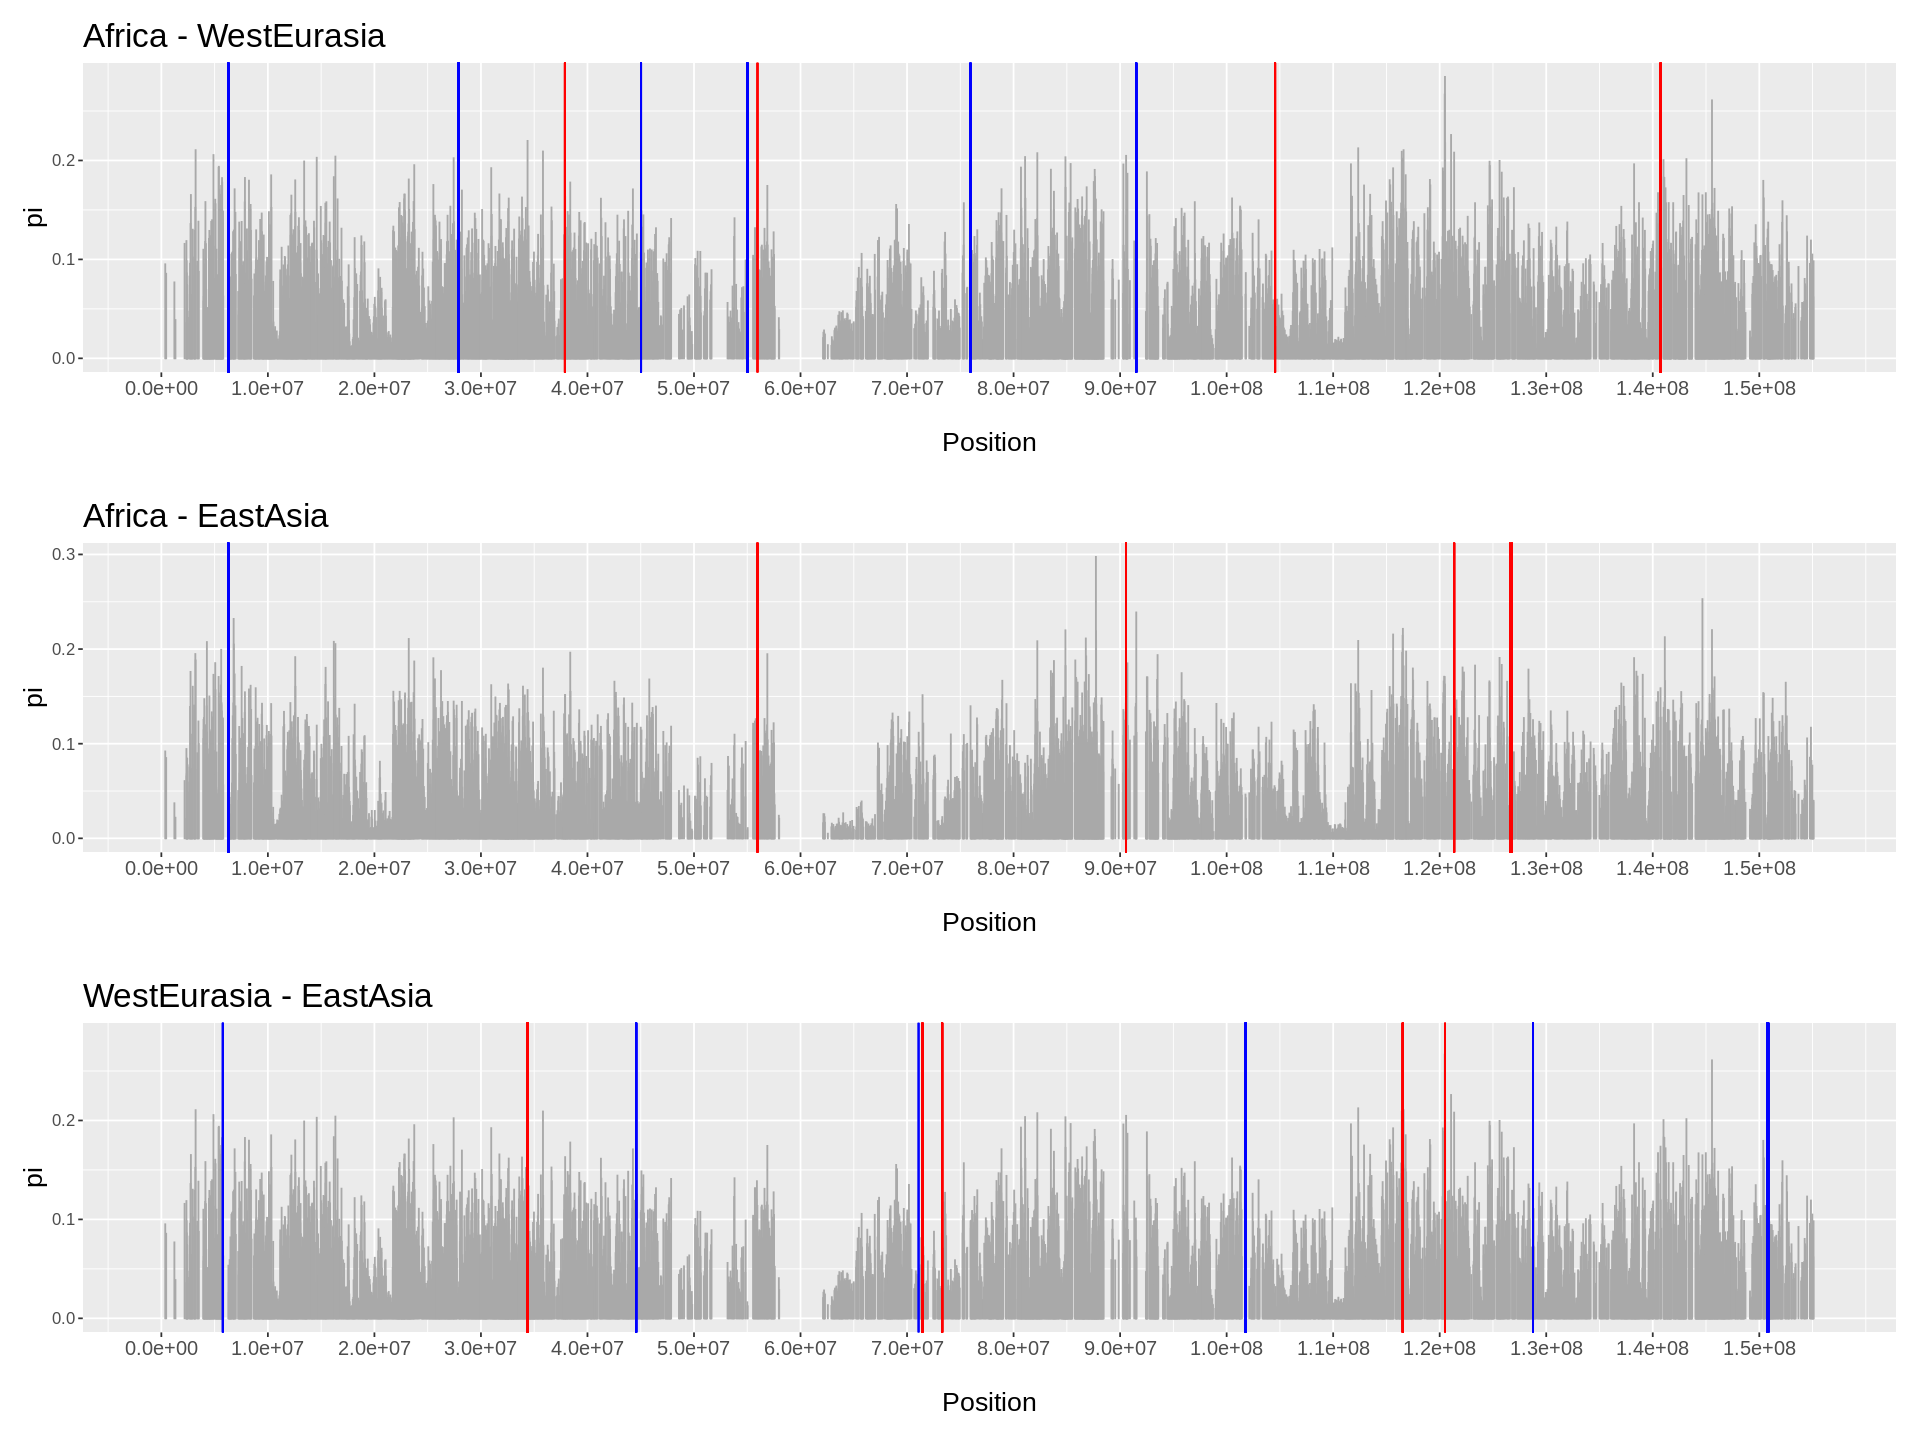

In [89]:
options(repr.plot.width=16, repr.plot.height=12)

AF_WE  <- ggplot() + 
    geom_col(aes(x = first_pos, y = window_pi_WE), color = "darkgrey", show.legend = FALSE) + 
    geom_vline(data = FST_AF_WE_500_genes, aes(xintercept = start1), color = "red") + 
    geom_vline(data = prop_signif_xpehh_WE_AF_high_500_genes, aes(xintercept = start1), color = "blue") +
    ggtitle("Africa - WestEurasia") + scale_x_continuous(breaks = seq(0, 1.5e+08, 1e+07)) + 
    xlab("\nPosition") + ylab("pi") + 
    theme( 
        axis.text.x = element_text(size = 12), 
        axis.text.y = element_text(size = 10), 
        axis.title=element_text(size=16),
        strip.text.x = element_text(size = 16),
        plot.title = element_text(size = 20)
        )



AF_EA  <- ggplot() + 
    geom_col(data = NULL, aes(x = first_pos, y = window_pi_EA), color = "darkgrey", show.legend = FALSE) + 
    geom_vline(data = FST_EA_AF_500_genes, aes(xintercept = start1), color = "red") + 
    geom_vline(data = prop_signif_xpehh_EA_AF_high_500_genes, aes(xintercept = start1), color = "blue") +
    ggtitle("Africa - EastAsia") + scale_x_continuous(breaks = seq(0, 1.5e+08, 1e+07))+ 
    xlab("\nPosition") + ylab("pi") + 
    theme( 
        axis.text.x = element_text(size = 12), 
        axis.text.y = element_text(size = 10), 
        axis.title=element_text(size=16),
        strip.text.x = element_text(size = 16),
        plot.title = element_text(size = 20)
        )

WE_EA  <- ggplot() + 
    geom_col(aes(x = first_pos, y = window_pi_WE), color = "darkgrey", show.legend = FALSE) + 
    geom_vline(data = FST_WE_EA_500_genes, aes(xintercept = start1), color = "red") + 
    geom_vline(data = prop_signif_xpehh_EA_WE_high_500_genes, aes(xintercept = start1), color = "blue") + 
    ggtitle("WestEurasia - EastAsia") + scale_x_continuous(breaks = seq(0, 1.5e+08, 1e+07))+ 
    xlab("\nPosition") + ylab("pi")  + 
    theme( 
        axis.text.x = element_text(size = 12), 
        axis.text.y = element_text(size = 10), 
        axis.title=element_text(size=16),
        strip.text.x = element_text(size = 16),
        plot.title = element_text(size = 20)
        )

mm <- theme(plot.margin=unit(rep(1,4), "line"))
gridExtra::grid.arrange(AF_WE +mm, AF_EA +mm, WE_EA +mm,ncol=1)


## Same plot including the significant regions of iHS analysis as well

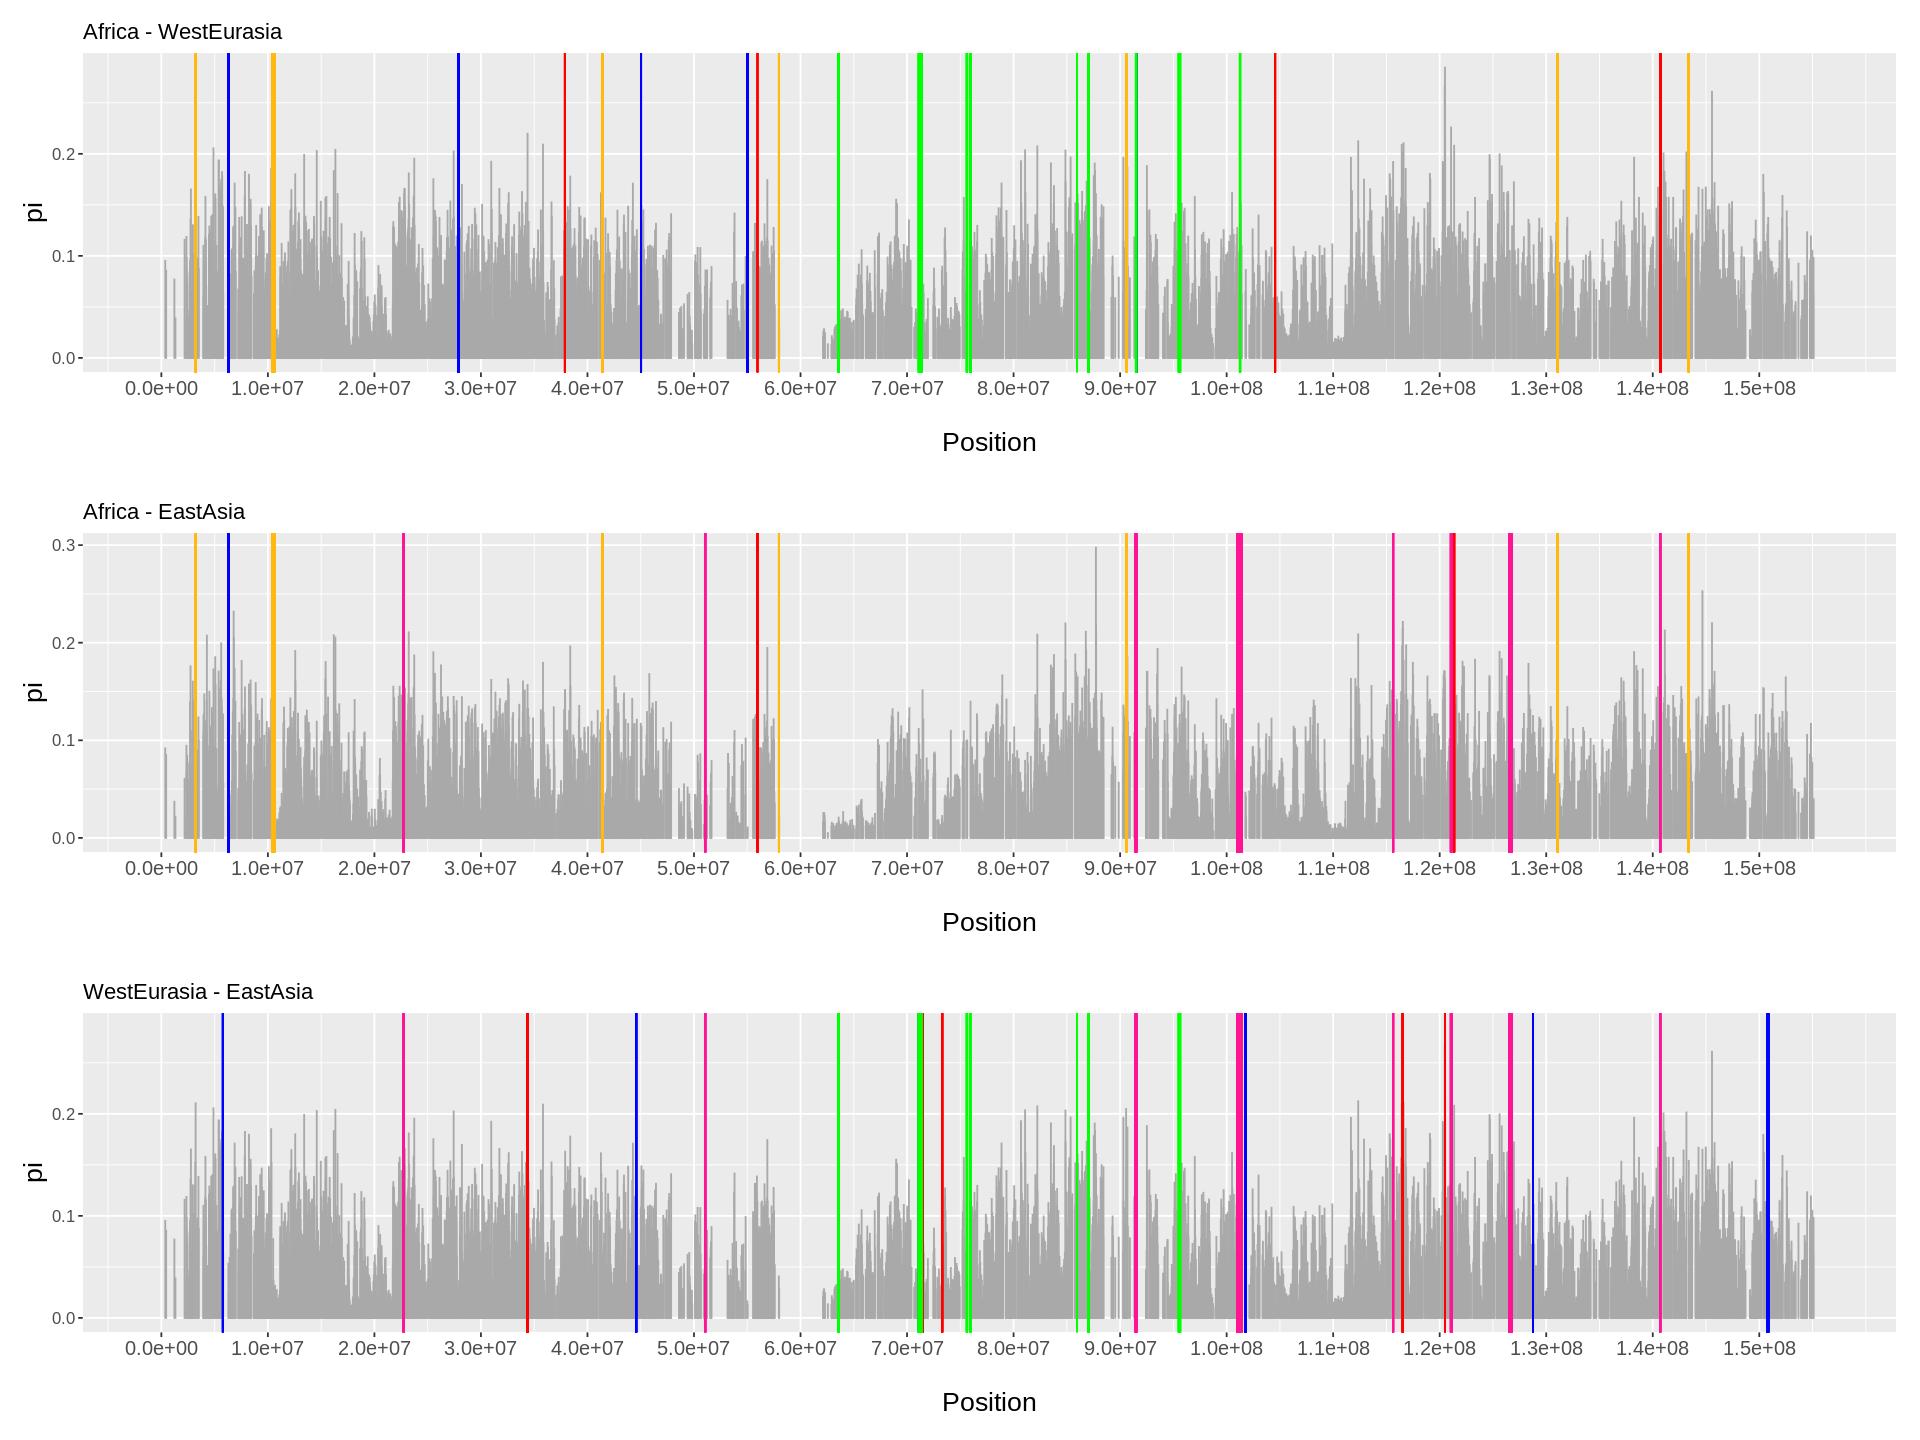

In [87]:
options(repr.plot.width=16, repr.plot.height=12)

AF_WE  <- ggplot() + 
    geom_col(aes(x = first_pos, y = window_pi_WE), color = "darkgrey", show.legend = FALSE) + 
    geom_vline(data = FST_AF_WE_500_genes, aes(xintercept = start1), color = "red") + 
    geom_vline(data = prop_signif_xpehh_WE_AF_high_500_genes, aes(xintercept = start1), color = "blue") +
    geom_vline(data = prop_signif_ihs_WE_high_500_genes, aes(xintercept = start1), color = "green") +
    geom_vline(data = prop_signif_ihs_AF_high_500_genes, aes(xintercept = start1), color = "darkgoldenrod1") +
    ggtitle("Africa - WestEurasia") + scale_x_continuous(breaks = seq(0, 1.5e+08, 1e+07)) + 
    xlab("\nPosition") + ylab("pi") + 
    theme( 
        axis.text.x = element_text(size = 12), 
        axis.text.y = element_text(size = 10), 
        axis.title=element_text(size=16),
        strip.text.x = element_text(size = 16)
        )



AF_EA  <- ggplot() + 
    geom_col(data = NULL, aes(x = first_pos, y = window_pi_EA), color = "darkgrey", show.legend = FALSE) + 
    geom_vline(data = FST_EA_AF_500_genes, aes(xintercept = start1), color = "red") + 
    geom_vline(data = prop_signif_xpehh_EA_AF_high_500_genes, aes(xintercept = start1), color = "blue") +
    geom_vline(data = prop_signif_ihs_AF_high_500_genes, aes(xintercept = start1), color = "darkgoldenrod1") +
    geom_vline(data = prop_signif_ihs_EA_high_500_genes, aes(xintercept = start1), color = "deeppink") +
    ggtitle("Africa - EastAsia") + scale_x_continuous(breaks = seq(0, 1.5e+08, 1e+07))+ 
    xlab("\nPosition") + ylab("pi") + 
    theme( 
        axis.text.x = element_text(size = 12), 
        axis.text.y = element_text(size = 10), 
        axis.title=element_text(size=16),
        strip.text.x = element_text(size = 16)
        )

WE_EA  <- ggplot() + 
    geom_col(aes(x = first_pos, y = window_pi_WE), color = "darkgrey", show.legend = FALSE) + 
    geom_vline(data = FST_WE_EA_500_genes, aes(xintercept = start1), color = "red") + 
    geom_vline(data = prop_signif_xpehh_EA_WE_high_500_genes, aes(xintercept = start1), color = "blue") + 
    geom_vline(data = prop_signif_ihs_WE_high_500_genes, aes(xintercept = start1), color = "green") +
    geom_vline(data = prop_signif_ihs_EA_high_500_genes, aes(xintercept = start1), color = "deeppink") +
    ggtitle("WestEurasia - EastAsia") + scale_x_continuous(breaks = seq(0, 1.5e+08, 1e+07))+ 
    xlab("\nPosition") + ylab("pi")  + 
    theme( 
        axis.text.x = element_text(size = 12), 
        axis.text.y = element_text(size = 10), 
        axis.title=element_text(size=16),
        strip.text.x = element_text(size = 16)
        )

mm <- theme(plot.margin=unit(rep(1,4), "line"))
gridExtra::grid.arrange(AF_WE +mm, AF_EA +mm, WE_EA +mm,ncol=1)
